In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/muhammadqasimbhatti/Documents/Kaggle/Mental Health Competition/train.csv')
test = pd.read_csv('/Users/muhammadqasimbhatti/Documents/Kaggle/Mental Health Competition/test.csv')
df.head()

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  Academic Pressure  Work Pressure  CGPA  \
0              Chef                NaN            5.0   NaN   
1           Teacher                NaN            4.0   NaN   
2               NaN                5.0            NaN  8.97   
3           Teacher                NaN            5.0   NaN   
4  Business Analyst                NaN            1.0   NaN   

   Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \
0                 NaN               2.0  More than 8 hours        Healthy   
1                 NaN               3.0  Less than 5 hours      Unhealthy   
2                 2.0               NaN          5-6 hours        Healthy   
3                 NaN               1.0  Less than 5 hours       Moderate   
4                 NaN               1.0          5-6 hours      Unhealthy   

    Degree Have you ever had suicidal thoughts ?  Work/Study Hours  \
0      BHM                                    No               1.0   
1      LLB                                   Yes               7.0   
2  B.Pharm                                   Yes               3.0   
3      BBA                                   Yes              10.0   
4      BBA                                   Yes               9.0   

   Financial Stress Family History of Mental Illness  Depression  
0               2.0                               No           0  
1               3.0                               No           1  
2               1.0                               No           1  
3               1.0                              Yes           1  
4               4.0                              Yes           0

In [324]:
print(test['Working Professional or Student'].value_counts()['Student'])


18772


### The Classes are imbalanced


In [325]:
num_columns = df.select_dtypes(include=np.number).columns
cat_columns = df.select_dtypes(include=object).columns
print(num_columns)
print(cat_columns)


Index(['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress', 'Depression'],
      dtype='object')
Index(['Name', 'Gender', 'City', 'Working Professional or Student',
       'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')


In [326]:
df['Depression'].value_counts()

Depression
0    115133
1     25567
Name: count, dtype: int64

In [327]:
temp = df[df['Profession'].isnull()][['Working Professional or Student', 'Profession']]
temp.head(10)
temp['Working Professional or Student'].value_counts()


Working Professional or Student
Student                 27867
Working Professional     8763
Name: count, dtype: int64

### Separate Student and Working Professional


In [328]:
df_student = df[df['Working Professional or Student'] == 'Student']
df_working = df[df['Working Professional or Student'] != 'Student']


### Student Data EDA

In [329]:
df_student.drop(columns=['Work Pressure', 'Job Satisfaction', 'Working Professional or Student', 'Profession'], inplace=True)
df_student.head(10)

/var/folders/sf/ljxr53zj5l36twj607g3xqsh0000gn/T/ipykernel_3935/2618640741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_student.drop(columns=['Work Pressure', 'Job Satisfaction', 'Working Professional or Student', 'Profession'], inplace=True)


id       Name  Gender   Age           City  Academic Pressure  CGPA  \
2    2     Yuvraj    Male  33.0  Visakhapatnam                5.0  8.97   
8    8  Aishwarya  Female  24.0      Bangalore                2.0  5.90   
26  26     Aditya    Male  31.0       Srinagar                3.0  7.03   
30  30     Prisha  Female  28.0       Varanasi                3.0  5.59   
32  32     Chhavi  Female  25.0         Jaipur                4.0  8.13   
33  33     Tanmay    Male  29.0           Pune                2.0  5.70   
52  52      Shrey    Male  30.0          Thane                3.0  9.54   
56  56       Isha  Female  30.0        Chennai                2.0  8.04   
59  59      Rohan    Male  28.0         Nagpur                3.0  9.79   
62  62    Nirvaan    Male  31.0         Nashik                2.0  8.38   

    Study Satisfaction     Sleep Duration Dietary Habits    Degree  \
2                  2.0          5-6 hours        Healthy   B.Pharm   
8                  5.0          5-6 hours       Moderate       BSc   
26                 5.0  Less than 5 hours        Healthy        BA   
30                 2.0          7-8 hours       Moderate       BCA   
32                 3.0          5-6 hours       Moderate    M.Tech   
33                 3.0  Less than 5 hours        Healthy       PhD   
52                 4.0          7-8 hours        Healthy       BSc   
56                 4.0  Less than 5 hours      Unhealthy  Class 12   
59                 1.0          7-8 hours       Moderate      B.Ed   
62                 3.0  Less than 5 hours       Moderate       LLB   

   Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
2                                    Yes               3.0               1.0   
8                                     No               3.0               2.0   
26                                    No               9.0               1.0   
30                                   Yes               4.0               5.0   
32                                   Yes               1.0               1.0   
33                                    No               4.0               1.0   
52                                    No               1.0               2.0   
56                                    No               0.0               1.0   
59                                   Yes              12.0               3.0   
62                                   Yes               2.0               5.0   

   Family History of Mental Illness  Depression  
2                                No           1  
8                               Yes           0  
26                              Yes           0  
30                              Yes           1  
32                               No           0  
33                               No           0  
52                               No           0  
56                              Yes           0  
59                               No           1  
62                               No           1

In [330]:
df_student['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy            10317
Moderate              9921
Healthy               7651
3                        1
Less than Healthy        1
Mihir                    1
1.0                      1
No Healthy               1
Less Healthy             1
M.Tech                   1
Male                     1
Yes                      1
2                        1
Name: count, dtype: int64

In [331]:
df_student.describe().T

count          mean           std    min       25%  \
id                  27901.0  70442.149421  40641.175216   2.00  35039.00   
Age                 27901.0     25.822300      4.905687  18.00     21.00   
Academic Pressure   27892.0      3.142227      1.380535   1.00      2.00   
CGPA                27892.0      7.658575      1.464499   5.03      6.29   
Study Satisfaction  27891.0      2.944893      1.360250   1.00      2.00   
Work/Study Hours    27901.0      7.156984      3.707642   0.00      4.00   
Financial Stress    27898.0      3.139867      1.437347   1.00      2.00   
Depression          27901.0      0.585499      0.492645   0.00      0.00   

                         50%        75%       max  
id                  70684.00  105818.00  140699.0  
Age                    25.00      30.00      59.0  
Academic Pressure       3.00       4.00       5.0  
CGPA                    7.77       8.92      10.0  
Study Satisfaction      3.00       4.00       5.0  
Work/Study Hours        8.00      10.00      12.0  
Financial Stress        3.00       4.00       5.0  
Depression              1.00       1.00       1.0

In [332]:
df_student['Academic Pressure'].fillna(df_student['Academic Pressure'].median(), inplace=True)
df_student['CGPA'].fillna(df_student['CGPA'].median(), inplace=True)
df_student['Study Satisfaction'].fillna(df_student['Study Satisfaction'].median(), inplace=True)
df_student['Financial Stress'].fillna(df_student['Financial Stress'].median(), inplace=True)


/var/folders/sf/ljxr53zj5l36twj607g3xqsh0000gn/T/ipykernel_3935/4040273090.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_student['Academic Pressure'].fillna(df_student['Academic Pressure'].median(), inplace=True)
/var/folders/sf/ljxr53zj5l36twj607g3xqsh0000gn/T/ipykernel_3935/4040273090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [333]:

# Convert sleep hours into numeric values with extended categories
sleep_duration_mapping = {
    "Less than 5 hours": 3,
    "5-6 hours": 5.5,
    "7-8 hours": 7.5,
    "More than 8 hours": 9,
    "3-4 hours": 3.5,
    "6-7 hours": 6.5,
    "4-5 hours": 4.5,
    "2-3 hours": 2.5,
    "4-6 hours": 5,
    "6-8 hours": 7,
    "1-6 hours": 3.5,  # Assuming average
    "9-11 hours": 10,
    "10-11 hours": 10.5,
    "8-9 hours": 8.5,
    "10-6 hours": 8,  # Assuming average
    "9-5": 7,  # Assuming average
    "3-6 hours": 4.5,
    "1-2 hours": 1.5,
    "9-5 hours": 7,  # Assuming average
}

# Calculate mode for sleep duration
mode_sleep_duration_student = df_student['Sleep Duration'].mode()[0]

# Map sleep duration to numeric values, using mode for unmapped categories
df_student['Sleep Duration'] = df_student['Sleep Duration'].apply(lambda x: sleep_duration_mapping.get(x, 3))



/var/folders/sf/ljxr53zj5l36twj607g3xqsh0000gn/T/ipykernel_3935/3836391899.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_student['Sleep Duration'] = df_student['Sleep Duration'].apply(lambda x: sleep_duration_mapping.get(x, 3))


In [334]:
# Create a mapping for valid dietary habit categories
valid_categories = ["Healthy", "Moderate", "Unhealthy"]
mode_dietary_habits_student = df_student['Dietary Habits'].mode()[0]
df_student["Dietary Habits"] = df_student["Dietary Habits"].apply(lambda x: x if x in valid_categories else mode_dietary_habits_student)


diet_score_student = df_student['Dietary Habits'].map({'Healthy': 2, 'Moderate': 1, 'Unhealthy': 0})
df_student['Dietary Habits'] = diet_score_student


print("\nDietary Habits categories after cleaning:")
print(df_student['Dietary Habits'].value_counts())



Dietary Habits categories after cleaning:
Dietary Habits
0    10329
1     9921
2     7651
Name: count, dtype: int64


/var/folders/sf/ljxr53zj5l36twj607g3xqsh0000gn/T/ipykernel_3935/478385084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_student["Dietary Habits"] = df_student["Dietary Habits"].apply(lambda x: x if x in valid_categories else mode_dietary_habits_student)
/var/folders/sf/ljxr53zj5l36twj607g3xqsh0000gn/T/ipykernel_3935/478385084.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_student['Dietary Habits'] = diet_score_student


In [335]:
df_student.head(10)

id       Name  Gender   Age           City  Academic Pressure  CGPA  \
2    2     Yuvraj    Male  33.0  Visakhapatnam                5.0  8.97   
8    8  Aishwarya  Female  24.0      Bangalore                2.0  5.90   
26  26     Aditya    Male  31.0       Srinagar                3.0  7.03   
30  30     Prisha  Female  28.0       Varanasi                3.0  5.59   
32  32     Chhavi  Female  25.0         Jaipur                4.0  8.13   
33  33     Tanmay    Male  29.0           Pune                2.0  5.70   
52  52      Shrey    Male  30.0          Thane                3.0  9.54   
56  56       Isha  Female  30.0        Chennai                2.0  8.04   
59  59      Rohan    Male  28.0         Nagpur                3.0  9.79   
62  62    Nirvaan    Male  31.0         Nashik                2.0  8.38   

    Study Satisfaction  Sleep Duration  Dietary Habits    Degree  \
2                  2.0             5.5               2   B.Pharm   
8                  5.0             5.5               1       BSc   
26                 5.0             3.0               2        BA   
30                 2.0             7.5               1       BCA   
32                 3.0             5.5               1    M.Tech   
33                 3.0             3.0               2       PhD   
52                 4.0             7.5               2       BSc   
56                 4.0             3.0               0  Class 12   
59                 1.0             7.5               1      B.Ed   
62                 3.0             3.0               1       LLB   

   Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
2                                    Yes               3.0               1.0   
8                                     No               3.0               2.0   
26                                    No               9.0               1.0   
30                                   Yes               4.0               5.0   
32                                   Yes               1.0               1.0   
33                                    No               4.0               1.0   
52                                    No               1.0               2.0   
56                                    No               0.0               1.0   
59                                   Yes              12.0               3.0   
62                                   Yes               2.0               5.0   

   Family History of Mental Illness  Depression  
2                                No           1  
8                               Yes           0  
26                              Yes           0  
30                              Yes           1  
32                               No           0  
33                               No           0  
52                               No           0  
56                              Yes           0  
59                               No           1  
62                               No           1

In [336]:
# from sklearn.preprocessing import LabelEncoder

# # Example: Specify which features are binary and which are non-binary
# binary_categorical_features = ['Gender', 'Family History of Mental Illness', 'Have you ever had suicidal thoughts ?']
# non_binary_categorical_features = ['City', 'Degree']

# # Apply Label Encoding for binary categorical features
# for column in binary_categorical_features:
#     df_student[column] = LabelEncoder().fit_transform(df_student[column])

# # Apply One-Hot Encoding for non-binary categorical features
# df_student = pd.get_dummies(df_student, columns=non_binary_categorical_features, drop_first=True)

# df_student.head(10)

In [337]:
df_student.head(10)

id       Name  Gender   Age           City  Academic Pressure  CGPA  \
2    2     Yuvraj    Male  33.0  Visakhapatnam                5.0  8.97   
8    8  Aishwarya  Female  24.0      Bangalore                2.0  5.90   
26  26     Aditya    Male  31.0       Srinagar                3.0  7.03   
30  30     Prisha  Female  28.0       Varanasi                3.0  5.59   
32  32     Chhavi  Female  25.0         Jaipur                4.0  8.13   
33  33     Tanmay    Male  29.0           Pune                2.0  5.70   
52  52      Shrey    Male  30.0          Thane                3.0  9.54   
56  56       Isha  Female  30.0        Chennai                2.0  8.04   
59  59      Rohan    Male  28.0         Nagpur                3.0  9.79   
62  62    Nirvaan    Male  31.0         Nashik                2.0  8.38   

    Study Satisfaction  Sleep Duration  Dietary Habits    Degree  \
2                  2.0             5.5               2   B.Pharm   
8                  5.0             5.5               1       BSc   
26                 5.0             3.0               2        BA   
30                 2.0             7.5               1       BCA   
32                 3.0             5.5               1    M.Tech   
33                 3.0             3.0               2       PhD   
52                 4.0             7.5               2       BSc   
56                 4.0             3.0               0  Class 12   
59                 1.0             7.5               1      B.Ed   
62                 3.0             3.0               1       LLB   

   Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
2                                    Yes               3.0               1.0   
8                                     No               3.0               2.0   
26                                    No               9.0               1.0   
30                                   Yes               4.0               5.0   
32                                   Yes               1.0               1.0   
33                                    No               4.0               1.0   
52                                    No               1.0               2.0   
56                                    No               0.0               1.0   
59                                   Yes              12.0               3.0   
62                                   Yes               2.0               5.0   

   Family History of Mental Illness  Depression  
2                                No           1  
8                               Yes           0  
26                              Yes           0  
30                              Yes           1  
32                               No           0  
33                               No           0  
52                               No           0  
56                              Yes           0  
59                               No           1  
62                               No           1

In [338]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# numerical_features = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Sleep Duration']
# df_student[numerical_features] = scaler.fit_transform(df_student[numerical_features])



In [339]:
df_student.drop(columns=['id', 'Name'], inplace=True)
df_student.head(10)
### Working Professional Data EDA


/var/folders/sf/ljxr53zj5l36twj607g3xqsh0000gn/T/ipykernel_3935/3028902230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_student.drop(columns=['id', 'Name'], inplace=True)


Gender   Age           City  Academic Pressure  CGPA  Study Satisfaction  \
2     Male  33.0  Visakhapatnam                5.0  8.97                 2.0   
8   Female  24.0      Bangalore                2.0  5.90                 5.0   
26    Male  31.0       Srinagar                3.0  7.03                 5.0   
30  Female  28.0       Varanasi                3.0  5.59                 2.0   
32  Female  25.0         Jaipur                4.0  8.13                 3.0   
33    Male  29.0           Pune                2.0  5.70                 3.0   
52    Male  30.0          Thane                3.0  9.54                 4.0   
56  Female  30.0        Chennai                2.0  8.04                 4.0   
59    Male  28.0         Nagpur                3.0  9.79                 1.0   
62    Male  31.0         Nashik                2.0  8.38                 3.0   

    Sleep Duration  Dietary Habits    Degree  \
2              5.5               2   B.Pharm   
8              5.5               1       BSc   
26             3.0               2        BA   
30             7.5               1       BCA   
32             5.5               1    M.Tech   
33             3.0               2       PhD   
52             7.5               2       BSc   
56             3.0               0  Class 12   
59             7.5               1      B.Ed   
62             3.0               1       LLB   

   Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
2                                    Yes               3.0               1.0   
8                                     No               3.0               2.0   
26                                    No               9.0               1.0   
30                                   Yes               4.0               5.0   
32                                   Yes               1.0               1.0   
33                                    No               4.0               1.0   
52                                    No               1.0               2.0   
56                                    No               0.0               1.0   
59                                   Yes              12.0               3.0   
62                                   Yes               2.0               5.0   

   Family History of Mental Illness  Depression  
2                                No           1  
8                               Yes           0  
26                              Yes           0  
30                              Yes           1  
32                               No           0  
33                               No           0  
52                               No           0  
56                              Yes           0  
59                               No           1  
62                               No           1

In [340]:
X = df_student.drop(columns=['Depression'])  # Assuming 'Depression' is the target variable
y = df_student['Depression']
y


2         1
8         0
26        0
30        1
32        0
33        0
52        0
56        0
59        1
62        1
83        1
91        0
94        1
100       0
103       1
106       1
120       1
132       1
139       0
145       1
161       0
162       0
166       1
172       0
173       1
176       1
186       1
193       1
208       0
214       1
222       1
232       1
239       0
240       0
242       0
253       0
255       1
263       0
270       0
273       1
274       1
277       0
280       0
285       1
294       0
301       0
303       0
305       0
310       0
312       1
315       0
316       1
324       1
328       1
335       0
336       0
337       1
340       1
343       1
347       1
348       0
351       1
367       1
370       0
381       1
385       1
392       0
398       0
407       0
408       0
414       0
420       1
421       1
423       0
425       0
429       0
441       0
447       1
454       1
455       1
457       1
464       1
467       0
475 

In [341]:
df_student.isnull().sum()


Gender                                   0
Age                                      0
City                                     0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [342]:
# X = train.drop(columns=['Depression'])
# y = train['Depression']

# from sklearn.model_selection import KFold
# from sklearn.preprocessing import StandardScaler

# # Identify numeric columns
# numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# print("Numeric Features:")
# print(numeric_features.tolist())

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Apply K-Fold Cross-Validation for Scaling
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# X_scaled = pd.DataFrame()  # DataFrame to hold scaled numeric features
# test_scaled = pd.DataFrame()  # DataFrame to hold scaled test numeric features

# for train_index, val_index in kf.split(X):
#     X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
    
#     # Fit the scaler on the training data and transform the validation data
#     scaler.fit(X_train_fold[numeric_features])
#     X_scaled_part = scaler.transform(X_val_fold[numeric_features])
    
#     # Collect the transformed data
#     X_scaled = pd.concat([X_scaled, pd.DataFrame(X_scaled_part, columns=numeric_features, index=X_val_fold.index)], sort=False)

# # Ensure the scaled features are in the same order
# X_scaled = X_scaled.loc[X.index]

# # Fit the scaler on the whole training data and transform the test data
# scaler.fit(X[numeric_features])
# test_scaled[numeric_features] = scaler.transform(test[numeric_features])

# # Replace original numeric features with scaled ones
# X[numeric_features] = X_scaled[numeric_features].values
# test[numeric_features] = test_scaled[numeric_features].values

# print("Numeric features have been scaled using StandardScaler.")

# X.head(10)


In [343]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# # Label encode 'Have you ever had suicidal thoughts ?'
# le_suicidal_thoughts = LabelEncoder()
# X['Have you ever had suicidal thoughts ?'] = le_suicidal_thoughts.fit_transform(X['Have you ever had suicidal thoughts ?'])

# # One hot encode 'City' and 'Degree'
# ohe = OneHotEncoder(sparse_output=False, drop='first')
# city_degree_transformer = ColumnTransformer(
#     transformers=[
#         ('city', ohe, ['City']),
#         ('degree', ohe, ['Degree'])
#     ],
#     remainder='passthrough'  # Keep the rest of the columns
# )

# X_encoded = city_degree_transformer.fit_transform(X)

# # Convert the transformed array back to a DataFrame
# X_encoded = pd.DataFrame(X_encoded, columns=city_degree_transformer.get_feature_names_out(), index=X.index)

# # Replace original DataFrame with the encoded one
# X = pd.concat([X.drop(columns=['City', 'Degree']), X_encoded], axis=1)

# # Binary encode 'Family History of Mental Illness' and 'Gender'
# X['Family History of Mental Illness'] = X['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})
# X['Gender'] = X['Gender'].map({'Male': 1, 'Female': 0})
# X.head()


In [344]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
X['Gender'].value_counts()

Gender
Male      15547
Female    12354
Name: count, dtype: int64

In [345]:
X.head()

Gender   Age           City  Academic Pressure  CGPA  Study Satisfaction  \
2     Male  33.0  Visakhapatnam                5.0  8.97                 2.0   
8   Female  24.0      Bangalore                2.0  5.90                 5.0   
26    Male  31.0       Srinagar                3.0  7.03                 5.0   
30  Female  28.0       Varanasi                3.0  5.59                 2.0   
32  Female  25.0         Jaipur                4.0  8.13                 3.0   

    Sleep Duration  Dietary Habits   Degree  \
2              5.5               2  B.Pharm   
8              5.5               1      BSc   
26             3.0               2       BA   
30             7.5               1      BCA   
32             5.5               1   M.Tech   

   Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
2                                    Yes               3.0               1.0   
8                                     No               3.0               2.0   
26                                    No               9.0               1.0   
30                                   Yes               4.0               5.0   
32                                   Yes               1.0               1.0   

   Family History of Mental Illness  
2                                No  
8                               Yes  
26                              Yes  
30                              Yes  
32                               No

In [346]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Drop any unnecessary columns (in this case, we keep all columns)

# Step 3: Encode Categorical Variables
# Binary Encoding for binary categorical features
label_encoders = {}

# Columns to label encode: 'Gender', 'Have you ever had suicidal thoughts?', 'Family History of Mental Illness'
binary_columns = ['Gender', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for col in binary_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Step 4: Feature Transformation
# Age Buckets
X['Age_Group'] = pd.cut(X['Age'], bins=[18, 25, 30, 35, 40, 60], labels=['18-25', '26-30', '31-35', '36-40', '40+'])

# Step 5: Interaction Features
X['Academic_Work_Interaction'] = X['Academic Pressure'] * X['Work/Study Hours']
X['Stress_Interaction'] = X['Financial Stress'] * X['Academic Pressure']

# Step 6: Feature Scaling
scaler = StandardScaler()
continuous_columns = ['Age', 'CGPA', 'Academic Pressure', 'Sleep Duration', 'Work/Study Hours', 'Financial Stress']
X[continuous_columns] = scaler.fit_transform(X[continuous_columns])

# Step 7: Prepare final dataset
# Drop original 'Age' column after creating Age_Group (and any redundant columns, if any)
X = pd.get_dummies(X, columns=['City', 'Degree', 'Age_Group'], drop_first=True)  # One-hot encode high-cardinality columns

# Display the transformed dataset
X.head()


Gender       Age  Academic Pressure      CGPA  Study Satisfaction  \
2        1  1.463165           1.345963  0.895612                 2.0   
8        0 -0.371474          -0.827494 -1.201041                 5.0   
26       1  1.055467          -0.103008 -0.429309                 5.0   
30       0  0.443921          -0.103008 -1.412756                 2.0   
32       0 -0.167625           0.621477  0.321935                 3.0   

    Sleep Duration  Dietary Habits  Have you ever had suicidal thoughts ?  \
2        -0.234782               2                                      1   
8        -0.234782               1                                      0   
26       -1.322567               2                                      0   
30        0.635446               1                                      1   
32       -0.234782               1                                      1   

    Work/Study Hours  Financial Stress  ...  Degree_Mthanya  Degree_P.Com  \
2          -1.121213         -1.488857  ...           False         False   
8          -1.121213         -0.793081  ...           False         False   
26          0.497095         -1.488857  ...           False         False   
30         -0.851495          1.294246  ...           False         False   
32         -1.660650         -1.488857  ...           False         False   

    Degree_PhD  Degree_S.Tech  Degree_Unite  Degree_Vivaan  Age_Group_26-30  \
2        False          False         False          False            False   
8        False          False         False          False            False   
26       False          False         False          False            False   
30       False          False         False          False             True   
32       False          False         False          False            False   

    Age_Group_31-35  Age_Group_36-40  Age_Group_40+  
2              True            False          False  
8             False            False          False  
26             True            False          False  
30            False            False          False  
32            False            False          False  

[5 rows x 128 columns]

In [353]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd

# Convert categorical features to category type
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
for feature in categorical_features:
    X[feature] = X[feature].astype('category')

def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 50, 500),  # Increased upper limit for more training rounds
        'depth': trial.suggest_int('depth', 3, 8),  # Expanded depth range for deeper trees if needed
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),  # Allow for even finer learning rates
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 500.0, log=True),  # Increased regularization range to prevent overfitting
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),  # Wider range to control minimum data in leaves
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),  # Slightly lower to increase diversity in each iteration
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.1, 1.0),  # Wider range to control feature selection per level
        'random_strength': trial.suggest_float('random_strength', 1e-7, 20.0, log=True),  # Increased range for randomness in splits
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 20.0),  # Broader range for bagging diversity
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.8, 1.5),  # Increased to handle potential class imbalance
        'thread_count': 10,  # Set this to match your available cores
        'random_seed': 42,
        'cat_features': categorical_features,  # Specify categorical features for CatBoost
        'verbose': False,
        'early_stopping_rounds': 50,
        'loss_function': 'Logloss',
        'border_count': trial.suggest_int('border_count', 128, 300),  # Expanded to try more binning options
        'eval_metric': 'AUC'
    }

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    fold_accuracies = []
    for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        model = CatBoostClassifier(**param)
        model.fit(X_train_fold, y_train_fold,cat_features = categorical_features)
        preds = model.predict(X_test_fold)
        accuracy = accuracy_score(y_test_fold, preds)
        fold_accuracies.append(accuracy)

    return np.mean(fold_accuracies)

# Run only one trial at a time to fully utilize all cores
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10, n_jobs=1)

# Retrieve the best model from the study
top_model = study.best_trial

# Train the best model
model_params = top_model.params
best_model = CatBoostClassifier(**model_params, random_seed=42, verbose=False, early_stopping_rounds=50, eval_metric='AUC')

# Implement Stratified K-Fold to evaluate the best model
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []

for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    best_model.fit(X_train_fold, y_train_fold, cat_features= categorical_features)
    preds = best_model.predict(X_test_fold)
    accuracy = accuracy_score(y_test_fold, preds)
    fold_accuracies.append(accuracy)
    print(f"Fold {fold + 1} Accuracy: {accuracy:.4f}")

# Calculate and print the mean accuracy of the folds
mean_accuracy = np.mean(fold_accuracies)
print(f"Mean Accuracy of Folds: {mean_accuracy:.4f}")


[I 2024-11-14 14:25:09,469] A new study created in memory with name: no-name-d762aa9a-e12b-4150-a94c-5e8d3454ad87
[I 2024-11-14 14:25:13,409] Trial 0 finished with value: 0.8473530006762576 and parameters: {'iterations': 301, 'depth': 6, 'learning_rate': 0.037927227081404655, 'l2_leaf_reg': 1.2307830068080454, 'min_child_samples': 128, 'subsample': 0.6527928850408613, 'colsample_bylevel': 0.38761459298786344, 'random_strength': 0.003455873357413748, 'bagging_temperature': 13.808803029700131, 'scale_pos_weight': 1.1065187394365272, 'border_count': 275}. Best is trial 0 with value: 0.8473530006762576.
[I 2024-11-14 14:25:17,982] Trial 1 finished with value: 0.8463136255305539 and parameters: {'iterations': 354, 'depth': 6, 'learning_rate': 0.05416748916940265, 'l2_leaf_reg': 6.408173921309877, 'min_child_samples': 151, 'subsample': 0.6789614933292015, 'colsample_bylevel': 0.7360837133532492, 'random_strength': 1.4436454237404206, 'bagging_temperature': 17.459029777354818, 'scale_pos_weig

Fold 1 Accuracy: 0.8513
Fold 2 Accuracy: 0.8444
Fold 3 Accuracy: 0.8461
Fold 4 Accuracy: 0.8441
Fold 5 Accuracy: 0.8509
Mean Accuracy of Folds: 0.8474


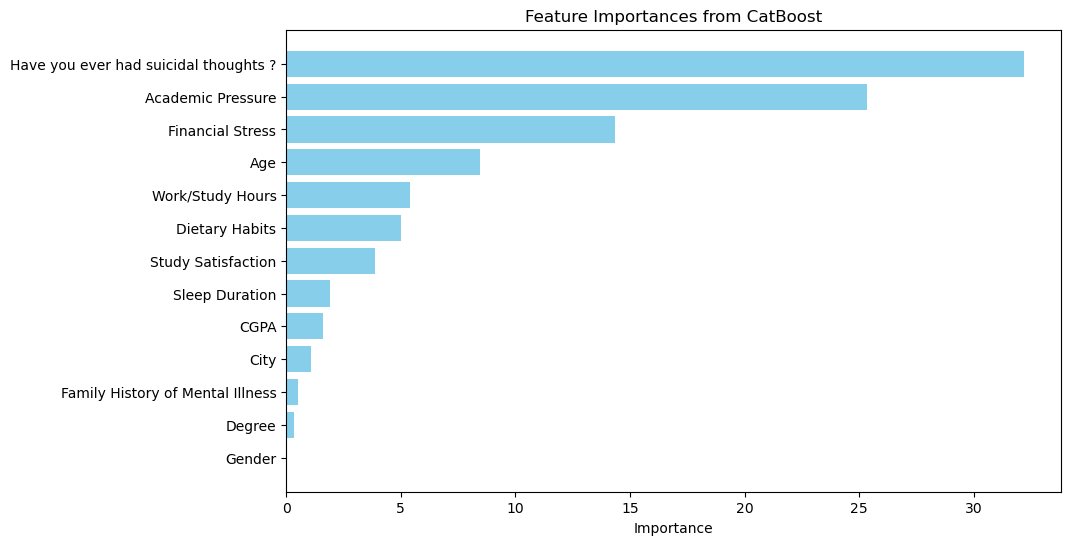

In [129]:
import matplotlib.pyplot as plt

# Get feature importances from the best model
feature_importances = best_model.get_feature_importance()

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from CatBoost')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()


In [54]:
import shap

# Create a SHAP explainer for the best model
explainer = shap.Explainer(best_model)
shap_values = explainer.shap_values(X)

# Get predictions and identify misclassified samples
preds = best_model.predict(X)
misclassified_indices = np.where(preds != y)[0]

# Display SHAP values for misclassified samples along with feature names
for index in misclassified_indices:
    print(f"\nSample index: {index}, True label: {y.iloc[index]}, Predicted label: {preds[index]}")
    feature_shap_values = shap_values[index]
    for feature_name, shap_value in zip(X.columns, feature_shap_values):
        print(f"Feature: {feature_name}, SHAP value: {shap_value}")



Sample index: 0, True label: 1, Predicted label: 0
Feature: Gender, SHAP value: 0.015967054040961534
Feature: Age, SHAP value: -0.8756539983899648
Feature: City, SHAP value: -0.08912282826669782
Feature: Academic Pressure, SHAP value: 1.5421279277491051
Feature: CGPA, SHAP value: 0.05841067553612313
Feature: Study Satisfaction, SHAP value: 0.19764946502325564
Feature: Sleep Duration, SHAP value: -0.08041358346627153
Feature: Dietary Habits, SHAP value: -0.6321582011919413
Feature: Degree, SHAP value: -0.05028388654804161
Feature: Have you ever had suicidal thoughts ?, SHAP value: 0.97776723882308
Feature: Work/Study Hours, SHAP value: -0.6278214509264345
Feature: Financial Stress, SHAP value: -1.199134056223092
Feature: Family History of Mental Illness, SHAP value: -0.1088644255545371

Sample index: 4, True label: 0, Predicted label: 1
Feature: Gender, SHAP value: 0.017318611099740523
Feature: Age, SHAP value: 0.08713708244344798
Feature: City, SHAP value: -0.0925583348299595
Feature:

In [138]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
import optuna

# Get the top 3 most important features from the best model
top_features = importance_df['Feature'].head(7).tolist()

# Filter the dataset to only include the top features
X_top = X[top_features]

categorical_features = X_top.select_dtypes(include=['object', 'category']).columns.tolist()
# Convert categorical features to category type
for feature in categorical_features:
    X[feature] = X[feature].astype('category')
    test[feature] = test[feature].astype('category')


# Define the objective function for hyperparameter tuning
def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 30, 300),
        'depth': trial.suggest_int('depth', 3, 9),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.0001, 20.0, log=True),
        'min_child_samples': trial.suggest_int('min_child_samples', 3, 300),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.5, 1.0),
        'random_strength': trial.suggest_float('random_strength', 0.000001, 20.0, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 20.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.1, 3),
        'thread_count': 10,
        'random_seed': 42,
        'cat_features': categorical_features,
        'verbose': False,
        'early_stopping_rounds': 50,
        'loss_function': 'Logloss',
        'eval_metric': 'Accuracy'
    }

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    fold_accuracies = []
    for fold, (train_index, test_index) in enumerate(skf.split(X_top, y)):
        X_train_fold, X_test_fold = X_top.iloc[train_index], X_top.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        model = CatBoostClassifier(**param)
        model.fit(X_train_fold, y_train_fold, cat_features=categorical_features)
        preds = model.predict(X_test_fold)
        accuracy = accuracy_score(y_test_fold, preds)
        fold_accuracies.append(accuracy)

    return np.mean(fold_accuracies)

# Create a study object and optimize the objective function for 10 trials
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Retrieve the best model from the study
top_model = study.best_trial

# Train the best model
model_params = top_model.params
best_model = CatBoostClassifier(**model_params, random_seed=42, verbose=False, early_stopping_rounds=50, eval_metric='Accuracy')

# Implement Stratified K-Fold to evaluate the best model
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []

for fold, (train_index, test_index) in enumerate(skf.split(X_top, y)):
    X_train_fold, X_test_fold = X_top.iloc[train_index], X_top.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    best_model.fit(X_train_fold, y_train_fold, cat_features=categorical_features)
    preds = best_model.predict(X_test_fold)
    accuracy = accuracy_score(y_test_fold, preds)
    fold_accuracies.append(accuracy)
    print(f"Fold {fold + 1} Accuracy: {accuracy:.4f}")

# Calculate and print the mean accuracy of the folds
mean_accuracy = np.mean(fold_accuracies)
print(f"Mean Accuracy of Folds: {mean_accuracy:.4f}")


[I 2024-11-14 12:51:29,760] A new study created in memory with name: no-name-0ce4635b-bf08-4cd0-bece-356823aeb6c1
[I 2024-11-14 12:51:33,524] Trial 0 finished with value: 0.8272463022582379 and parameters: {'iterations': 246, 'depth': 7, 'learning_rate': 0.343030543031323, 'l2_leaf_reg': 0.05338284499740251, 'min_child_samples': 287, 'subsample': 0.5246153281652939, 'colsample_bylevel': 0.9296314858256638, 'random_strength': 1.233869581623981e-05, 'bagging_temperature': 15.636325718353865, 'scale_pos_weight': 0.9365011413396683}. Best is trial 0 with value: 0.8272463022582379.
[I 2024-11-14 12:51:36,510] Trial 1 finished with value: 0.8414750699859163 and parameters: {'iterations': 233, 'depth': 6, 'learning_rate': 0.08349598677481093, 'l2_leaf_reg': 0.03642681398007538, 'min_child_samples': 190, 'subsample': 0.8465723925328354, 'colsample_bylevel': 0.8885181936238831, 'random_strength': 0.08044916696383556, 'bagging_temperature': 11.140697568882265, 'scale_pos_weight': 1.3191497876852

Fold 1 Accuracy: 0.8504
Fold 2 Accuracy: 0.8410
Fold 3 Accuracy: 0.8444
Fold 4 Accuracy: 0.8387
Fold 5 Accuracy: 0.8432
Mean Accuracy of Folds: 0.8436


In [59]:
# Aggregate SHAP values for each feature
mean_shap_values = np.abs(shap_values).mean(axis=0)  # Removed .values
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'mean_shap_value': mean_shap_values
}).sort_values(by='mean_shap_value', ascending=False)

print(feature_importance_df)


                                  feature  mean_shap_value
9   Have you ever had suicidal thoughts ?         1.168776
3                       Academic Pressure         0.999679
11                       Financial Stress         0.694791
1                                     Age         0.479102
10                       Work/Study Hours         0.397115
7                          Dietary Habits         0.387255
5                      Study Satisfaction         0.299959
6                          Sleep Duration         0.195814
4                                    CGPA         0.116776
12       Family History of Mental Illness         0.105559
2                                    City         0.088834
8                                  Degree         0.058661
0                                  Gender         0.019148


In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import optuna

# Define the objective function for hyperparameter tuning
def optimize_xgb(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 600),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
    }
    xgb_model = XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss')

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        xgb_model.fit(X_train, y_train)
        preds = xgb_model.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        accuracies.append(accuracy)
    return np.mean(accuracies)

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(optimize_xgb, n_trials=20)

# Retrieve the best parameters
best_params = study.best_params
best_xgb_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')

# Train the best XGBoost model using the complete dataset
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    best_xgb_model.fit(X_train_fold, y_train_fold)

# Predict using the XGBoost model
xgb_preds = best_xgb_model.predict(X_test_fold)

# Calculate the accuracy of the XGBoost model
xgb_accuracy = accuracy_score(y_test_fold, xgb_preds)
print(f"XGBoost Model Accuracy: {xgb_accuracy:.4f}")


[I 2024-11-13 00:31:26,661] A new study created in memory with name: no-name-318e40c8-54a9-4923-9f78-88d02a8d7133
/Users/muhammadqasimbhatti/Anaconda_installation/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:31:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/muhammadqasimbhatti/Anaconda_installation/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:31:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/muhammadqasimbhatti/Anaconda_installation/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:31:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/muhammadqasimbhatti/Anacond

XGBoost Model Accuracy: 0.8473


In [2215]:
# Sort trials based on their performance and retrieve the top three
sorted_trials = sorted(study.trials, key=lambda trial: trial.value, reverse=True)
top_three_trials = sorted_trials[:3]

# Train and save predictions for each of the top three models
for i, trial in enumerate(top_three_trials):
    # Initialize the model with the best parameters from the trial
    model = CatBoostClassifier(**trial.params, random_seed=42, verbose=False, eval_metric='AUC')
    
    # Fit the model on the complete training dataset
    model.fit(X, y, cat_features=categorical_features)
    
    # Make predictions on the test dataset
    final_test_predictions = model.predict(test)
    
    # Create dataframe with test IDs and predictions
    results_df = pd.DataFrame({
        'id': test_ids,
        'Depression': final_test_predictions
    })
    
    # Save results to CSV without index
    filename = f'submission_catboost_{trial.value:.4f}.csv'
    results_df.to_csv(filename, index=False)
    
    print(f"Results for model {i+1} saved to {filename}")
    print("\nFirst few rows of results for model {i+1}:")
    print(results_df.head())

Results for model 1 saved to submission_catboost_0.9399.csv

First few rows of results for model {i+1}:
       id  Depression
0  140700           0
1  140701           0
2  140702           0
3  140703           1
4  140704           0
Results for model 2 saved to submission_catboost_0.9398.csv

First few rows of results for model {i+1}:
       id  Depression
0  140700           0
1  140701           0
2  140702           0
3  140703           1
4  140704           0
Results for model 3 saved to submission_catboost_0.9398.csv

First few rows of results for model {i+1}:
       id  Depression
0  140700           0
1  140701           0
2  140702           0
3  140703           1
4  140704           0


In [82]:
from lightgbm import LGBMClassifier
import optuna
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd

# Define the objective function for LightGBM
def lgbm_objective(trial):
    param = {
        'num_leaves': trial.suggest_int('num_leaves', 5, 100),
        'max_depth': trial.suggest_int('max_depth', 2, 16),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.25),
        'n_estimators': trial.suggest_int('n_estimators', 150, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 250),
        'subsample': trial.suggest_float('subsample', 0.1, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.02, 0.9),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.05, 2.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.05, 2.0),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.1, 2),
        'random_state': 42,
        'metric': 'auc',
        'objective': 'binary',
        'n_jobs': 3  # Enable the use of all available threads
    }

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    fold_accuracies = []
    for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        model = LGBMClassifier(**param)
        model.fit(X_train_fold, y_train_fold)
        preds = model.predict(X_test_fold)
        accuracy = accuracy_score(y_test_fold, preds)
        fold_accuracies.append(accuracy)
    return np.mean(fold_accuracies)

# Create a study object for LightGBM
lgbm_study = optuna.create_study(direction="maximize")
lgbm_study.optimize(lgbm_objective, n_trials=10, n_jobs=1)

# Retrieve the best model from the study
lgbm_top_model = lgbm_study.best_trial

# Train the best model and test it on validation data
fold_accuracies = []
lgbm_model_params = lgbm_top_model.params
lgbm_best_model = LGBMClassifier(**lgbm_model_params, random_seed=42, silent=True, n_jobs=3, verbose=0)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    lgbm_best_model.fit(X_train_fold, y_train_fold)
    preds = lgbm_best_model.predict(X_test_fold)
    accuracy = accuracy_score(y_test_fold, preds)
    fold_accuracies.append(accuracy)
    print(f"Using Best LGBM Model: Validation Fold {fold+1} Accuracy: {accuracy:.4f}")

mean_accuracy = np.mean(fold_accuracies)
print(f"Mean accuracy for the best LGBM model: {mean_accuracy:.4f}")

# Save parameters and accuracy to a file
with open("lgbm_model_performance.txt", "a") as file:
    file.write(f"Params: {lgbm_top_model.params}, Validation Accuracy: {mean_accuracy:.4f}\n")


[I 2024-11-14 12:22:19,373] A new study created in memory with name: no-name-d4f70e16-b2ac-48cb-a488-c10ee236b996
[W 2024-11-14 12:22:19,378] Trial 0 failed with parameters: {'num_leaves': 36, 'max_depth': 2, 'learning_rate': 0.15021693940709432, 'n_estimators': 494, 'min_child_samples': 238, 'subsample': 0.3492165118607252, 'colsample_bytree': 0.14399145652741044, 'reg_alpha': 0.3751747800200883, 'reg_lambda': 1.0402208538023532, 'scale_pos_weight': 1.0381398456677382} because of the following error: ValueError('pandas dtypes must be int, float or bool.\nFields with bad pandas dtypes: Gender: object, City: object, Degree: object, Have you ever had suicidal thoughts ?: object, Family History of Mental Illness: object').
Traceback (most recent call last):
  File "/Users/muhammadqasimbhatti/Anaconda_installation/anaconda3/lib/python3.12/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/var/folder

ValueError: pandas dtypes must be int, float or bool.
Fields with bad pandas dtypes: Gender: object, City: object, Degree: object, Have you ever had suicidal thoughts ?: object, Family History of Mental Illness: object

In [ ]:
# # Retrieve the best 3 models from the study

# top_models = lgbm_study.get_trials(deepcopy=False, states=[optuna.trial.TrialState.COMPLETE])
# top_models.sort(key=lambda trial: trial.value, reverse=True)
# best_three_models = top_models[:3]

# # Train the best 3 models once and store them
# trained_models = []
# for trial in best_three_models:
#     model_params = trial.params
#     model = LGBMClassifier(**model_params, random_state=42, silent=True, n_jobs=3)
#     model.fit(X_train, y_train)
#     trained_models.append(model)

# # Predict on X_test using the trained models
# ensemble_predictions = [model.predict(X_test) for model in trained_models]

# # Convert predictions to numpy array and get majority vote
# ensemble_predictions = np.array(ensemble_predictions)
# final_predictions = np.apply_along_axis(lambda x: np.bincount(x, minlength=2).argmax(), axis=0, arr=ensemble_predictions)

# # Output the accuracy of the ensemble model
# ensemble_accuracy = accuracy_score(y_test, final_predictions)
# print(f"Ensemble Model Accuracy: {ensemble_accuracy:.4f}")

# # Print classification report for the ensemble model
# print("\nClassification Report for Ensemble Model:")
# print(classification_report(y_test, final_predictions))

# # Make predictions on test dataset using the trained models
# test_predictions = [model.predict(test) for model in trained_models]

# # Convert predictions to numpy array and get majority vote
# test_predictions = np.array(test_predictions)
# final_test_predictions = np.apply_along_axis(lambda x: np.bincount(x, minlength=2).argmax(), axis=0, arr=test_predictions)

# # Create dataframe with test IDs and predictions
# results_df = pd.DataFrame({
#     'id': test_ids,
#     'Depression': final_test_predictions
# })

# # Save results to CSV without index
# results_df.to_csv(f'submission_lgbm_{ensemble_accuracy:.4f}.csv', index=False)

# print("Results saved to submission_lgbm.csv")
# print("\nFirst few rows of results:")
# print(results_df.head())


In [ ]:
# # Load the best model parameters from the file and create seven LightGBM models

# #0.9394
# best_params_0 = {
#     'num_leaves': 20,
#     'max_depth': 16,
#     'learning_rate': 0.0848416870074553,
#     'n_estimators': 206,
#     'min_child_samples': 107,
#     'subsample': 0.5711321624766442,
#     'colsample_bytree': 0.7798078541869621,
#     'reg_alpha': 1.2275161885313777,
#     'reg_lambda': 0.9975430987118526,
#     'scale_pos_weight': 0.9789268184079968,
#     'random_state': 42,
#     'metric': 'accuracy',
#     'objective': 'binary'
# }
# best_params_6 = {
#     'num_leaves': 6,
#     'max_depth': 10,
#     'learning_rate': 0.08463134383900794,
#     'n_estimators': 815,
#     'min_child_samples': 160,
#     'subsample': 0.25674611723848206,
#     'colsample_bytree': 0.292312742969389,
#     'reg_alpha': 0.062499135989303845,
#     'reg_lambda': 0.5895089625561618,
#     'scale_pos_weight': 1.0183230641517838,
#     'random_state': 42,
#     'metric': 'accuracy',
#     'objective': 'binary'
# }

# best_params_7 = {
#     'num_leaves': 5,
#     'max_depth': 16,
#     'learning_rate': 0.13496081786548303,
#     'n_estimators': 590,
#     'min_child_samples': 41,
#     'subsample': 0.7055733486544014,
#     'colsample_bytree': 0.3408694828026245,
#     'reg_alpha': 0.5876000905323011,
#     'scale_pos_weight': 1.14899698370991,
#     'reg_lambda': 0.9048763397060431,
#     'random_state': 42,
#     'metric': 'accuracy',
#     'objective': 'binary'
# }

# # best_params_1 = {
# #     'num_leaves': 10,
# #     'max_depth': 13,
# #     'learning_rate': 0.07816115162882467,
# #     'n_estimators': 228,
# #     'min_child_samples': 22,
# #     'subsample': 0.4938200083689593,
# #     'colsample_bytree': 0.4473341130299121,
# #     'reg_alpha': 1.503635888471512,
# #     'reg_lambda': 0.5820095417203568,
# #     'scale_pos_weight': 1.0287016668121143,
# #     'random_state': 42,
# #     'metric': 'accuracy',
# #     'objective': 'binary'
# # }

# # best_params_2 = {
# #     'num_leaves': 7,
# #     'max_depth': 7,
# #     'learning_rate': 0.08684584847555041,
# #     'n_estimators': 459,
# #     'min_child_samples': 83,
# #     'scale_pos_weight': 1.0287016668121143,
# #     'subsample': 0.5810616462037733,
# #     'colsample_bytree': 0.3749110968508681,
# #     'reg_alpha': 0.750822476761735,
# #     'reg_lambda': 0.16643264777962907,
# #     'random_state': 42,
# #     'metric': 'accuracy',
# #     'objective': 'binary'
# # }

# # best_params_3 = {
# #     'num_leaves': 21,
# #     'max_depth': 6,
# #     'learning_rate': 0.08870453392237598,
# #     'n_estimators': 171,
# #     'min_child_samples': 40,
# #     'subsample': 0.13794790119898281,
# #     'scale_pos_weight': 1.0287016668121143,
# #     'colsample_bytree': 0.33234701483637774,
# #     'reg_alpha': 0.35384112403630114,
# #     'reg_lambda': 0.21776834318291055,
# #     'random_state': 42,
# #     'metric': 'accuracy',
# #     'objective': 'binary'
# # }

# # best_params_4 = {
# #     'num_leaves': 12,
# #     'max_depth': 12,
# #     'learning_rate': 0.13552344141193437,
# #     'n_estimators': 312,
# #     'min_child_samples': 115,
# #     'subsample': 0.5061868744743441,
# #     'colsample_bytree': 0.15087353298868322,
# #     'reg_alpha': 1.421372562047065,
# #     'reg_lambda': 0.7840468800301836,
# #     'random_state': 42,
# #     'scale_pos_weight': 1.0287016668121143,
# #     'metric': 'accuracy',
# #     'objective': 'binary'
# # }

# # best_params_5 = {
# #     'num_leaves': 28,
# #     'max_depth': 16,
# #     'learning_rate': 0.010556540477690654,
# #     'n_estimators': 995,
# #     'min_child_samples': 114,
# #     'subsample': 0.8502140212699687,
# #     'colsample_bytree': 0.3070518212603518,
# #     'reg_alpha': 1.2316643109343381,
# #     'reg_lambda': 1.2336271766305382,
# #     'random_state': 42,
# #     'scale_pos_weight': 0.9066902282314742,
# #     'metric': 'accuracy',
# #     'objective': 'binary'
# # }







# # Create and train seven LightGBM models with the best parameters
# models = [LGBMClassifier(**params) for params in [best_params_0, best_params_6, best_params_7]]
# for model in models:
#     model.fit(X_train, y_train)

# # Predict on X_test using the trained models and ensemble their outputs
# ensemble_predictions = [model.predict(X_test) for model in models]

# # Convert predictions to numpy array and get majority vote
# ensemble_predictions = np.array(ensemble_predictions)
# final_ensemble_predictions = np.apply_along_axis(lambda x: np.bincount(x, minlength=2).argmax(), axis=0, arr=ensemble_predictions)

# # Calculate ensemble accuracy on X_test
# ensemble_accuracy = accuracy_score(y_test, final_ensemble_predictions)
# print(f"Ensemble Model Accuracy on X_test: {ensemble_accuracy:.4f}")

# # Predict on test dataset using the trained models and ensemble their outputs
# test_predictions = [model.predict(test) for model in models]

# # Convert predictions to numpy array and get majority vote
# test_predictions = np.array(test_predictions)
# final_test_predictions = np.apply_along_axis(lambda x: np.bincount(x, minlength=2).argmax(), axis=0, arr=test_predictions)

# # Create dataframe with test IDs and predictions
# results_df = pd.DataFrame({
#     'id': test_ids,
#     'Depression': final_test_predictions
# })

# # Save results to CSV without index
# results_df.to_csv(f'submission_lgbm_{ensemble_accuracy:.4f}.csv', index=False)

# print("Results saved to submission_lgbm.csv")
# print("\nFirst few rows of results:")
# print(results_df.head())